# day05 : Penalized Linear Regression : Ridge (L2) vs Lasso (L1)

# Objectives

* Learn how to avoid overfitting by including an L2-penalty on weight coefficients in training loss
* * Known as "Ridge" regression
* Learn how to avoid overfitting by including an L1-penalty on weight coefficients
* * Known as "Lasso" regression

# Outline
* [Part 1: Ridge Regression](#part1)
* [Part 2: MinMaxScalar](#part2)
* [Part 3: Lasso Regression](#part3)

# Takeaways

* In practice, be sure to *rescale* features to common range before using Ridge or Lasso
* Ridge is simple to use and simple to train
* Lasso can be better for *feature selection*, where we want to know which subset of provided features are useful for prediction (and which could be omitted because their weights are set to exactly zero)
* Lasso is more tricky to train (don't write yourself!) but good libraries like sklearn make it easy


In [1]:
import numpy as np

# Import the pandas (data management library)
import pandas as pd

In [3]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [4]:
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.metrics

# Step 1: Simple sine-wave dataset

In [5]:
SEED = 12345
prng = np.random.RandomState(SEED)

In [6]:
def true_prediction_function(x):
    return 3.0 + 2.0 * np.sin(2.1 * x)

In [7]:
N = 9        # num training examples

x_N = np.linspace(-3, 3, N) + 0.3 * prng.randn(N)
y_N = true_prediction_function(x_N) + 0.06 * prng.randn(N)

In [8]:
M = 500      # num testing examples (to show "true" generalization)

x_te_M = np.linspace(-4, 4, M)
y_te_M = true_prediction_function(x_te_M) + 0.06 * prng.randn(M)

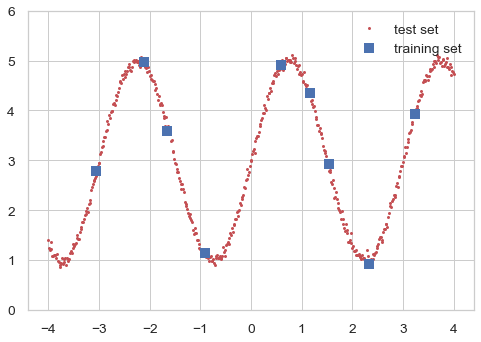

In [9]:
plt.plot(x_te_M, y_te_M, 'r.', label='test set')
plt.plot(x_N, y_N, 'bs', markersize=10, label='training set')

plt.legend(loc='upper right');
plt.ylim([0, 6.0]);

In [10]:
x_N1 = x_N.reshape((N,1))
x_te_M1 = x_te_M.reshape((M,1))

In [11]:
def pretty_print_weights(pipeline):
    feature_names = pipeline.named_steps['preproc'].get_feature_names(['x'])
    for ff in range(len(feature_names)):
        coef_val_ff = pipeline.named_steps['regr'].coef_[ff]
        if np.allclose(coef_val_ff, 0):
            coef_str = "   0 exactly"
        else:
            coef_str = "% 8.3f" % coef_val_ff
        print("Feature %5s: weight coef %s" % (feature_names[ff], coef_str))
            
    print("Intercept    : weight coef % 8.3f" % (pipeline.named_steps['regr'].intercept_))

# Part 1: Comparing Ridge regression to unpenalized LinearRegression

In [12]:
lin_regr_pipeline = sklearn.pipeline.Pipeline([
        ("preproc", sklearn.preprocessing.PolynomialFeatures(10, include_bias=False)),
        ("regr", sklearn.linear_model.LinearRegression()),
        ])

In [13]:
lin_regr_pipeline.fit(x_N1, y_N);

In [14]:
yhat_N = lin_regr_pipeline.predict(x_N1)
print("Training set error: % .3f" % (sklearn.metrics.mean_squared_error(yhat_N, y_N)))

Training set error:  0.000


In [15]:
pretty_print_weights(lin_regr_pipeline)

Feature     x: weight coef    2.396
Feature   x^2: weight coef   -0.894
Feature   x^3: weight coef    0.309
Feature   x^4: weight coef   -0.443
Feature   x^5: weight coef   -1.073
Feature   x^6: weight coef    0.483
Feature   x^7: weight coef    0.261
Feature   x^8: weight coef   -0.107
Feature   x^9: weight coef   -0.016
Feature  x^10: weight coef    0.007
Intercept    : weight coef    3.844


#### Try Ridge with SMALL alpha = 0.01

In [16]:
ridge_small_alpha_pipeline = sklearn.pipeline.Pipeline([
        ("preproc", sklearn.preprocessing.PolynomialFeatures(10, include_bias=False)),
        ("regr", sklearn.linear_model.Ridge(alpha=0.01)),   # <<< LOOK, Ridge regression with alpha = 0.01
        ])

In [17]:
ridge_small_alpha_pipeline.fit(x_N1, y_N);

In [18]:
yhat_N = ridge_small_alpha_pipeline.predict(x_N1)
print("Training set error: % .3f" % (sklearn.metrics.mean_squared_error(yhat_N, y_N)))

Training set error:  0.000


In [19]:
pretty_print_weights(ridge_small_alpha_pipeline)

Feature     x: weight coef    2.371
Feature   x^2: weight coef   -0.862
Feature   x^3: weight coef    0.315
Feature   x^4: weight coef   -0.425
Feature   x^5: weight coef   -1.067
Feature   x^6: weight coef    0.462
Feature   x^7: weight coef    0.259
Feature   x^8: weight coef   -0.103
Feature   x^9: weight coef   -0.016
Feature  x^10: weight coef    0.006
Intercept    : weight coef    3.821


### Discussion 1a: How do these new weight values compare to the previous unpenalized model?

Are they similar? Smaller magnitude? Bigger magnitude?

TODO write your answer here

TODO write code here to count how many of the weights have a larger absolute value with alpha = 0.0 

### Try Ridge with BIG alpha = 1000.0

In [35]:
ridge_big_alpha_pipeline = sklearn.pipeline.Pipeline([
        ("preproc", sklearn.preprocessing.PolynomialFeatures(9, include_bias=False)),
        ("regr", sklearn.linear_model.Ridge(alpha=1000.0)),  # <<< LOOK, Ridge regression with alpha = 1000
        ])

In [36]:
ridge_big_alpha_pipeline.fit(x_N1, y_N);

In [37]:
yhat_N = ridge_big_alpha_pipeline.predict(x_N1)
print("Training set error: % .3f" % (sklearn.metrics.mean_squared_error(yhat_N, y_N)))

Training set error:  0.942


In [38]:
pretty_print_weights(ridge_big_alpha_pipeline)

Feature     x: weight coef    0.004
Feature   x^2: weight coef   -0.000
Feature   x^3: weight coef    0.002
Feature   x^4: weight coef    0.000
Feature   x^5: weight coef   -0.002
Feature   x^6: weight coef    0.002
Feature   x^7: weight coef   -0.014
Feature   x^8: weight coef   -0.000
Feature   x^9: weight coef    0.001
Intercept    : weight coef    3.377


### Exercise 1b: Try Ridge with HUGE alpha = 100000.0

Can you predict what will happen to the learned weights? What about the learned intercept?

In [25]:
# TODO write code here

### Discussion 1c: Why does the intercept behave the way it does here?

In [24]:
# TODO write explanation here

### Exercise 1d: Why do we set `include_bias=False` in these pipelines? What happens otherwise?

In [25]:
# TODO write code here

### Exercise 1d: Can you plot the predictions on the test set for the pipelines above?

Does the small alpha result still essentially perfectly reconstruct the training data?

What about the big alpha value? The HUGE alpha value?

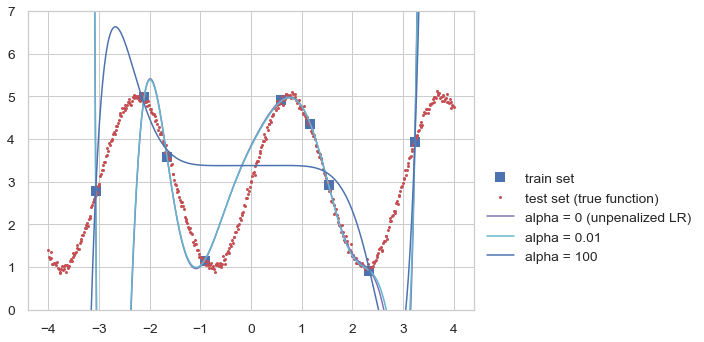

In [51]:
plt.plot(x_N, y_N, 'bs', markersize=10, label='train set')
plt.plot(x_te_M, y_te_M, 'r.', label='test set (true function)')


plt.plot(x_te_M, lin_regr_pipeline.predict(x_te_M1), 'm-', label='alpha = 0 (unpenalized LR)')
plt.plot(x_te_M, ridge_small_alpha_pipeline.predict(x_te_M1), 'c-', label='alpha = 0.01')   # TODO fix this line
plt.plot(x_te_M, ridge_big_alpha_pipeline.predict(x_te_M1), 'b-', label='alpha = 100') # TODO fix this line

plt.legend(bbox_to_anchor=(1.0, 0.5));
plt.ylim([0, 7]);


# Part 2: Rescaling  

What is happening inside our regression pipeline?

Let's look at the feature transformation to find out.

Remember, we are putting in a scalar $x$

Our high-degree polynomial features are producing features

$\phi(x) = [x ~~ x^2 ~~ x^3 ~~ \ldots x^9 ]$

Can we visualize these?

In [52]:
np.set_printoptions(precision=2, suppress=True, linewidth=100)

print("============= Displaying transformed features of Polynomial Features + Ridge pipeline")
print("Raw features:")
print(x_N1)

step1_NF = ridge_big_alpha_pipeline.steps[0][1].transform(x_N1)
print("After step 1: new shape is " + str(step1_NF.shape))
print(step1_NF)


============= Displaying transformed features of Polynomial Features + Ridge pipeline
Raw features:
[[-3.06]
 [-2.11]
 [-1.66]
 [-0.92]
 [ 0.59]
 [ 1.17]
 [ 1.53]
 [ 2.33]
 [ 3.23]]
After step 1: new shape is (9, 9)
[[    -3.06      9.37    -28.69     87.84   -268.91    823.25  -2520.3    7715.69 -23620.9 ]
 [    -2.11      4.44     -9.34     19.68    -41.46     87.33   -183.94    387.43   -816.04]
 [    -1.66      2.74     -4.54      7.52    -12.45     20.61    -34.13     56.51    -93.57]
 [    -0.92      0.84     -0.77      0.71     -0.65      0.59     -0.54      0.5      -0.46]
 [     0.59      0.35      0.21      0.12      0.07      0.04      0.02      0.01      0.01]
 [     1.17      1.36      1.59      1.86      2.17      2.54      2.97      3.46      4.05]
 [     1.53      2.33      3.57      5.45      8.33     12.72     19.44     29.7      45.37]
 [     2.33      5.45     12.72     29.7      69.34    161.88    377.91    882.24   2059.61]
 [     3.23     10.44     33.72    108.9

Read about MinMaxScaler here:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html>

Let's add a min-max scalar to our pipeline

In [54]:
rescaled_ridge_big_alpha_pipeline = sklearn.pipeline.Pipeline([
        ('rescale', sklearn.preprocessing.MinMaxScaler()),
        ("preproc", sklearn.preprocessing.PolynomialFeatures(10, include_bias=False)),
        ("regr", sklearn.linear_model.Ridge(alpha=100.0)),   # <<< LOOK, Ridge regression with alpha = 0.0001
        ])

Let's fit that pipeline to our dataset

In [55]:
rescaled_ridge_big_alpha_pipeline.fit(x_N1, y_N);

OK, now, we inspect the features produced after each step

In [56]:
np.set_printoptions(precision=2, suppress=True, linewidth=100)

print("============= Displaying transformed features of MinMaxScalar + Polynomial Features + Ridge pipeline")

print("Raw features:")
print(x_N1)

step1_NF = rescaled_ridge_big_alpha_pipeline.steps[0][1].transform(x_N1)
print("After step 1: new shape is " + str(step1_NF.shape))
print(step1_NF)

step2_NG = rescaled_ridge_big_alpha_pipeline.steps[1][1].transform(step1_NF)
print("After step 2: new shape is " + str(step2_NG.shape))
print(step2_NG)

============= Displaying transformed features of MinMaxScalar + Polynomial Features + Ridge pipeline
Raw features:
[[-3.06]
 [-2.11]
 [-1.66]
 [-0.92]
 [ 0.59]
 [ 1.17]
 [ 1.53]
 [ 2.33]
 [ 3.23]]
After step 1: new shape is (9, 1)
[[0.  ]
 [0.15]
 [0.22]
 [0.34]
 [0.58]
 [0.67]
 [0.73]
 [0.86]
 [1.  ]]
After step 2: new shape is (9, 10)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.15 0.02 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.22 0.05 0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.34 0.12 0.04 0.01 0.   0.   0.   0.   0.   0.  ]
 [0.58 0.34 0.2  0.11 0.07 0.04 0.02 0.01 0.01 0.  ]
 [0.67 0.45 0.3  0.2  0.14 0.09 0.06 0.04 0.03 0.02]
 [0.73 0.53 0.39 0.28 0.21 0.15 0.11 0.08 0.06 0.04]
 [0.86 0.74 0.63 0.54 0.46 0.4  0.34 0.29 0.25 0.22]
 [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]]


### Discussion 2b: What do you think is the benefit of using MinMaxScalar before PolynomialFeatures?

TODO Write your explanation here

### BONUS Exercise 2c: What math operation is performed by MinMaxScalar?

**If you are pressed for time, skip this and look at Part 3 below **

See if you can use the code below to get an idea

Hint, look at the min and max values of the training set

In [31]:
print("Smallest training set x = % 9.3f" % (x_N.min()))
print("Smallest training set x = % 9.3f" % (x_N.max()))

Smallest training set x =    -3.061
Smallest training set x =     3.231


In [32]:
pretrained_mm_scaler = rescaled_ridge_big_alpha_pipeline.steps[0][1] # Unpack from the pipeline

In [33]:
for x in np.linspace(-5, 5, 11):
    phi = pretrained_mm_scaler.transform(np.asarray([[x]]))
    print("x = % 9.3f | \phi(x) = % 9.3f" % (x, phi))

x =    -5.000 | \phi(x) =    -0.308
x =    -4.000 | \phi(x) =    -0.149
x =    -3.000 | \phi(x) =     0.010
x =    -2.000 | \phi(x) =     0.169
x =    -1.000 | \phi(x) =     0.328
x =     0.000 | \phi(x) =     0.487
x =     1.000 | \phi(x) =     0.645
x =     2.000 | \phi(x) =     0.804
x =     3.000 | \phi(x) =     0.963
x =     4.000 | \phi(x) =     1.122
x =     5.000 | \phi(x) =     1.281


<a id="part3"></a>

# Part 3: Lasso Regression

### Small alpha value

In [57]:
lasso_small_alpha_pipeline = sklearn.pipeline.Pipeline([
        ('rescale', sklearn.preprocessing.MinMaxScaler()),
        ("preproc", sklearn.preprocessing.PolynomialFeatures(10, include_bias=False)),
        ("regr", sklearn.linear_model.Lasso(alpha=0.001, max_iter=1000000)), # LASSO with alpha = 0.1
        ])

In [62]:
lasso_small_alpha_pipeline.fit(x_N1, y_N);

In [61]:
yhat_N = lasso_small_alpha_pipeline.predict(x_N1)
print("Training set error: % .3f" % (sklearn.metrics.mean_squared_error(yhat_N, y_N)))

Training set error:  1.090


In [63]:
pretty_print_weights(lasso_small_alpha_pipeline)

Feature     x: weight coef   -2.226
Feature   x^2: weight coef    0 exactly
Feature   x^3: weight coef   18.826
Feature   x^4: weight coef    0 exactly
Feature   x^5: weight coef    0 exactly
Feature   x^6: weight coef  -48.260
Feature   x^7: weight coef    0 exactly
Feature   x^8: weight coef    0 exactly
Feature   x^9: weight coef    0 exactly
Feature  x^10: weight coef   32.067
Intercept    : weight coef    3.473


### Moderate alpha value

In [64]:
lasso_moderate_alpha_pipeline = sklearn.pipeline.Pipeline([
        ('rescale', sklearn.preprocessing.MinMaxScaler()),
        ("preproc", sklearn.preprocessing.PolynomialFeatures(10, include_bias=False)),
        ("regr", sklearn.linear_model.Lasso(alpha=0.03, max_iter=100000)), # LASSO with alpha = 0.1
        ])

In [65]:
lasso_moderate_alpha_pipeline.fit(x_N1, y_N);

In [66]:
yhat_N = lasso_moderate_alpha_pipeline.predict(x_N1)
print("Training set error: % .3f" % (sklearn.metrics.mean_squared_error(yhat_N, y_N)))

Training set error:  1.954


In [67]:
pretty_print_weights(lasso_moderate_alpha_pipeline)

Feature     x: weight coef    0 exactly
Feature   x^2: weight coef   -0.193
Feature   x^3: weight coef    0 exactly
Feature   x^4: weight coef    0 exactly
Feature   x^5: weight coef    0 exactly
Feature   x^6: weight coef    0 exactly
Feature   x^7: weight coef    0 exactly
Feature   x^8: weight coef    0 exactly
Feature   x^9: weight coef    0 exactly
Feature  x^10: weight coef    0.039
Intercept    : weight coef    3.343


### Big alpha value

In [68]:
lasso_big_alpha_pipeline = sklearn.pipeline.Pipeline([
        ('rescale', sklearn.preprocessing.MinMaxScaler()),
        ("preproc", sklearn.preprocessing.PolynomialFeatures(10, include_bias=False)),
        ("regr", sklearn.linear_model.Lasso(alpha=0.1, max_iter=100000)), # LASSO with alpha = 0.1
        ])

In [69]:
lasso_big_alpha_pipeline.fit(x_N1, y_N);

In [70]:
yhat_N = lasso_big_alpha_pipeline.predict(x_N1)
print("Training set error: % .3f" % (sklearn.metrics.mean_squared_error(yhat_N, y_N)))

Training set error:  1.971


In [71]:
pretty_print_weights(lasso_big_alpha_pipeline)

Feature     x: weight coef    0 exactly
Feature   x^2: weight coef    0 exactly
Feature   x^3: weight coef    0 exactly
Feature   x^4: weight coef    0 exactly
Feature   x^5: weight coef    0 exactly
Feature   x^6: weight coef    0 exactly
Feature   x^7: weight coef    0 exactly
Feature   x^8: weight coef    0 exactly
Feature   x^9: weight coef    0 exactly
Feature  x^10: weight coef    0 exactly
Intercept    : weight coef    3.279


### Discussion 3b: Why do you think the intercept is regularized differently than other weights?

TODO write your answer here

### Tiny alpha value 

In [72]:
lasso_tiny_alpha_pipeline = sklearn.pipeline.Pipeline([
        ('rescale', sklearn.preprocessing.MinMaxScaler()),
        ("preproc", sklearn.preprocessing.PolynomialFeatures(10, include_bias=False)),
        ("regr", sklearn.linear_model.Lasso(alpha=0.00001, max_iter=1000000)),         # LASSO!
        ])

In [74]:
lasso_tiny_alpha_pipeline.fit(x_N1, y_N);

C:\Users\bq100\.conda\envs\comp135_2020f_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21853066573871635, tolerance: 0.0017735114493534951
  model = cd_fast.enet_coordinate_descent(


In [44]:
yhat_N = lasso_tiny_alpha_pipeline.predict(x_N1)
print("Training set error: % .3f" % (sklearn.metrics.mean_squared_error(yhat_N, y_N)))

Training set error:  0.047


In [45]:
pretty_print_weights(lasso_tiny_alpha_pipeline)

Feature     x: weight coef   78.936
Feature   x^2: weight coef -620.092
Feature   x^3: weight coef  1423.962
Feature   x^4: weight coef -715.867
Feature   x^5: weight coef -687.139
Feature   x^6: weight coef    0 exactly
Feature   x^7: weight coef  424.579
Feature   x^8: weight coef  368.810
Feature   x^9: weight coef    0 exactly
Feature  x^10: weight coef -272.054
Intercept    : weight coef    2.812


### Discussion 3c: What do you think that convergence warning means?